# Used variables

- caseid
- prglngth is the length of pregnancy
- outcome. 1 is a live birth
- pregordr first is 1 second is 2 etc
- birthord: serial number for live births
- agepreg mothes age
- birthwgt_lb and birthwgt_oz contain the pounds and ounces part of the birth weight
- finalwgt statistical weight assocaited with the respondent.

# Problem 2.4

In [134]:
import pandas as pd

In [156]:
import nsfg
import math
df = nsfg.ReadFemPreg()

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

/Users/Will/Devel/dsp/ThinkStats2/code/nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [157]:
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16

In [159]:
len(df.totalwgt_lb)
df.totalwgt_lb.count()

9038

In [163]:
df.ageatend.count()

1131

In [164]:
df.agecon.count()

13593

In [148]:
df.birthwgt_lb, df.birthwgt_oz

(0         8
 1         7
 2         9
 3         7
 4         6
 5         8
 6         9
 7         8
 8         7
 9         6
 10        7
 11        7
 12        4
 13      NaN
 14      NaN
 15        7
 16        7
 17        6
 18      NaN
 19        8
 20        8
 21        5
 22      NaN
 23        6
 24        7
 25        6
 26        8
 27        7
 28        6
 29        7
          ..
 13563     7
 13564     7
 13565     8
 13566     7
 13567   NaN
 13568   NaN
 13569     5
 13570     6
 13571     6
 13572     5
 13573     6
 13574     6
 13575   NaN
 13576     6
 13577   NaN
 13578     6
 13579     7
 13580   NaN
 13581     6
 13582   NaN
 13583   NaN
 13584     6
 13585   NaN
 13586   NaN
 13587   NaN
 13588     6
 13589   NaN
 13590   NaN
 13591     7
 13592     7
 Name: birthwgt_lb, dtype: float64, 0        13
 1        14
 2         2
 3         0
 4         3
 5         9
 6         9
 7         6
 8         9
 9        10
 10       13
 11        0
 12        0
 13

In [141]:
df.totalwgt_lb

13      NaN
22      NaN
45      NaN
46      NaN
57      NaN
84      NaN
85      NaN
86      NaN
93      NaN
103     NaN
109     NaN
111     NaN
112     NaN
128     NaN
152     NaN
153     NaN
194     NaN
195     NaN
196     NaN
197     NaN
198     NaN
199     NaN
200     NaN
201     NaN
221     NaN
254     NaN
255     NaN
257     NaN
292     NaN
296     NaN
         ..
13278   NaN
13285   NaN
13286   NaN
13305   NaN
13310   NaN
13329   NaN
13330   NaN
13331   NaN
13343   NaN
13364   NaN
13372   NaN
13374   NaN
13383   NaN
13385   NaN
13386   NaN
13409   NaN
13428   NaN
13429   NaN
13526   NaN
13534   NaN
13535   NaN
13536   NaN
13541   NaN
13542   NaN
13575   NaN
13585   NaN
13586   NaN
13587   NaN
13589   NaN
13590   NaN
Name: totalwgt_lb, dtype: float64

In [29]:
first_births = df[df.pregordr == 1]
later_births = df[df.pregordr != 1]

CohenEffectSize(first_births.totalwgt_lb, later_births.totalwgt_lb)

-0.069118253488209561

The difference in weights between the two values is not statistically significant.

# Problem 3.1

In [36]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()


AttributeError: 'DataFrame' object has no attribute 'NUMKDHH'

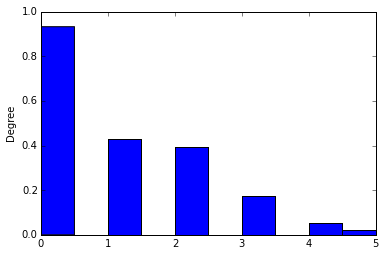

In [44]:
resp.numkdhh.plot(kind='hist',normed=True)

Class size paradox is that more people are in large classes than in small classes. So it is with large families. 

In [63]:
def biased_pmf(pmf, label='biased'):
    new_pmf = pmf.Copy(label='biased')
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf
    


In [66]:
import thinkplot, thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh)
biased = biased_pmf(pmf)

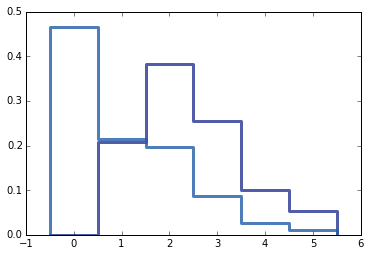

In [70]:
thinkplot.Pmfs([biased, pmf])

Purple is biased in this case. We can see that it is much more biased than the other things are. 

In [72]:
biased.Mean(), pmf.Mean()

(2.4036791006642821, 1.0242051550438309)

# Problem 4.2

In [84]:
%pylab inline
import numpy as np
samples = np.random.random(1000)

Populating the interactive namespace from numpy and matplotlib


In [82]:
import seaborn as sns

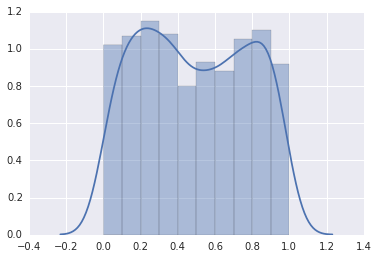

In [94]:
sns.distplot(samples);

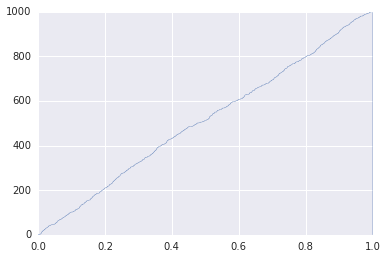

In [93]:
hist(samples, 5e5, cumulative=True, histtype='step');

# Problem 5.1

In [99]:
import scipy.stats
mu = 178
sd = 7.7
height_dist = scipy.stats.norm(loc=mu, scale=sd)

height_dist.cdf(185) - height_dist.cdf(178) 

0.31834892955655103

So 32% of the population can be in the Blue man group

# Problem 7.1

Problem: It does not seem like there is much of an overlap between those things. The input for the age on conception is always there so I will use that instead. 

In [117]:
df.ageatend.mean()

25.935455349248453

In [155]:
sum(df.totalwgt_lb)

nan

In [129]:
df = df[np.isfinite(df.ageatend)]
df = df[np.isfinite(df.totalwgt_lb)]

In [151]:
df = df[pd.notnull(df.ageatend)]

In [152]:
len(df)

1131

In [153]:
df.totalwgt_lb

13      NaN
22      NaN
45      NaN
46      NaN
57      NaN
84      NaN
85      NaN
86      NaN
93      NaN
103     NaN
109     NaN
111     NaN
112     NaN
128     NaN
152     NaN
153     NaN
194     NaN
195     NaN
196     NaN
197     NaN
198     NaN
199     NaN
200     NaN
201     NaN
221     NaN
254     NaN
255     NaN
257     NaN
292     NaN
296     NaN
         ..
13278   NaN
13285   NaN
13286   NaN
13305   NaN
13310   NaN
13329   NaN
13330   NaN
13331   NaN
13343   NaN
13364   NaN
13372   NaN
13374   NaN
13383   NaN
13385   NaN
13386   NaN
13409   NaN
13428   NaN
13429   NaN
13526   NaN
13534   NaN
13535   NaN
13536   NaN
13541   NaN
13542   NaN
13575   NaN
13585   NaN
13586   NaN
13587   NaN
13589   NaN
13590   NaN
Name: totalwgt_lb, dtype: float64

LinAlgError: Arrays cannot be empty

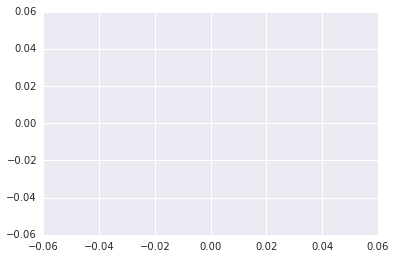

In [122]:
sns.regplot(x='totalwgt_lb', y='ageatend', data=df)

# Problem 8.2

In [101]:
samples = np.random.exponential(2, 1000)

In [110]:
std_error = samples.std() / math.sqrt(len(samples))

In [114]:
samples.mean() - std_error, samples.mean() + std_error 
#This isn't exactly correct because 90% isn't exactly one standard error but it is close

(1.9766928653610836, 2.1010333493701316)

# Q7

>Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way.  It helps incorporate conditional probabilities into our conclusions.

>Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.  

# Q8

>How do frequentist and Bayesian statistics compare?

